In [32]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
import datetime as dt
from datetime import timedelta
import seaborn as sb

In [33]:
df_excence=pd.read_excel("Data/excence.xlsx")
df_elec=pd.read_excel("Data/elec.xlsx")

In [34]:
df_elec_excence=pd.merge(df_elec, df_excence, left_on="LIEU", right_on="Name", how="inner")
df_elec_excence["Date première saisie"] = pd.to_datetime(df_elec_excence["Date première saisie"])
df_elec_excence["Date dernière saisie"] = pd.to_datetime(df_elec_excence["Date dernière saisie"])
df_elec_excence["Date première saisie excense"] = pd.to_datetime(df_elec_excence["Value"])
df_elec_excence["Date première saisie excense"] = df_elec_excence["Date première saisie excense"] + pd.Timedelta(hours=2)
df_elec_excence["Date première saisie excense"] =df_elec_excence["Date première saisie excense"] .apply(lambda x: x.replace(tzinfo=None))
df_elec_excence=df_elec_excence.drop(["Value","GMT_TIME", "Name"], axis=1)

In [35]:
df_elec_excence["delta_saisie"]=df_elec_excence["Date première saisie excense"]-df_elec_excence["Date première saisie"]
df_elec_excence["delta en minutes"] =df_elec_excence["delta_saisie"].dt.total_seconds()/60

In [36]:
df_elec_excence

,LIEU,Date première saisie,Date dernière saisie,Source,Date première saisie excense,delta_saisie,delta en minutes
0,974_03,2022-06-19 18:44:22,2022-06-19 18:44:22,ELECPLUS,2022-06-19 20:11:49,0 days 01:27:27,87.450000
1,974_07,2022-06-19 19:14:47,2022-06-20 03:42:21,MINISTERE INTERIEUR,2022-06-19 20:11:49,0 days 00:57:02,57.033333
2,974_02,2022-06-19 19:15:59,2022-06-19 19:15:59,ELECPLUS,2022-06-19 20:11:49,0 days 00:55:50,55.833333
3,974_05,2022-06-19 19:16:51,2022-06-19 19:16:51,ELECPLUS,2022-06-19 20:11:49,0 days 00:54:58,54.966667
4,019_01,2022-06-19 19:41:27,2022-06-19 19:41:27,ELECPLUS,2022-06-19 20:05:49,0 days 00:24:22,24.366667
...,...,...,...,...,...,...,...
549,099_10,2022-06-20 00:28:13,2022-06-20 00:28:13,MINISTERE INTERIEUR,2022-06-20 00:54:01,0 days 00:25:48,25.800000
550,099_06,2022-06-20 00:29:11,2022-06-20 00:29:11,MINISTERE INTERIEUR,2022-06-20 00:39:54,0 days 00:10:43,10.716667
551,099_07,2022-06-20 00:30:49,2022-06-20 00:30:49,MINISTERE INTERIEUR,2022-06-20 00:39:54,0 days 00:09:05,9.083333
552,099_09,2022-06-20 00:31:20,2022-06-20 00:31:20,MINISTERE INTERIEUR,2022-06-20 00:54:01,0 days 00:22:41,22.683333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,Source,LIEU,Date première saisie,Date dernière saisie,Date première saisie excense,delta_saisie,delta en minutes
0,ELECPLUS,535,535,535,535,535,535
1,MINISTERE INTERIEUR,19,19,19,19,19,19


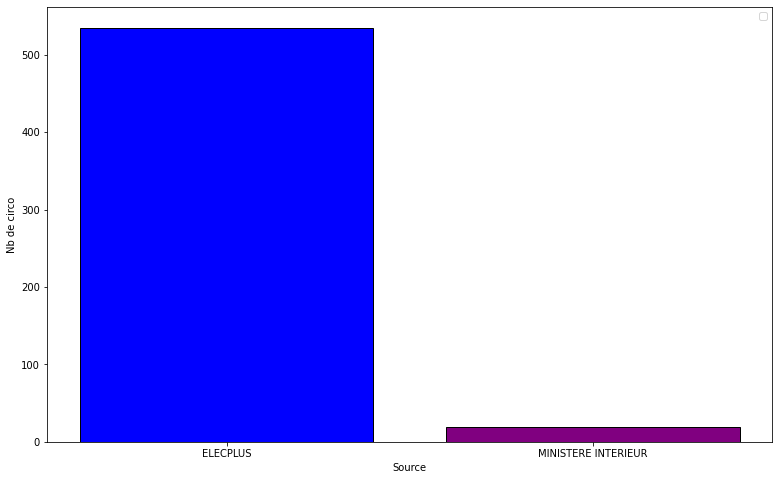

In [37]:
fig, ax =plt.subplots()
df_source=df_elec_excence.groupby("Source").count().reset_index()
ax.bar(df_source["Source"], df_source["LIEU"],color=["blue", "purple"], edgecolor="k")
ax.set_xlabel("Source")
ax.set_ylabel("Nb de circo")
ax.legend();
df_source

In [38]:
df_elec_excence.describe()

,delta_saisie,delta en minutes
count,554,554.000000
mean,0 days 00:19:12.122743682,19.202046
std,0 days 00:28:26.066331795,28.434439
min,-1 days +23:19:57,-40.050000
25%,0 days 00:01:48,1.800000
50%,0 days 00:11:40.500000,11.675000
75%,0 days 00:27:26.500000,27.441667
max,0 days 02:52:44,172.733333


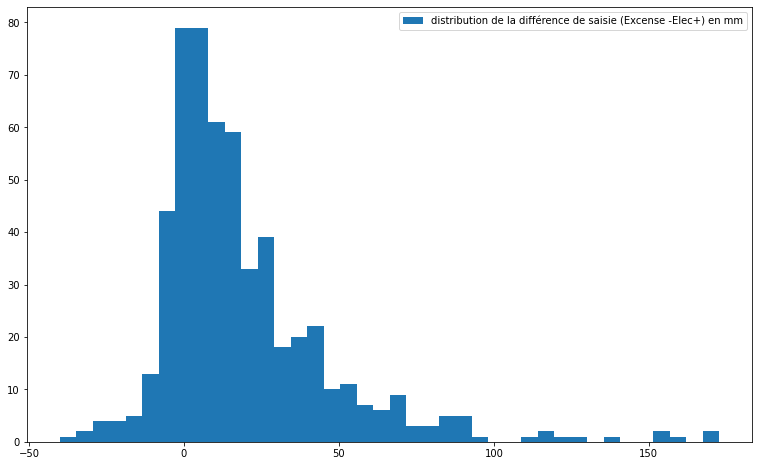

In [39]:
fig,ax =plt.subplots()
ax.hist(df_elec_excence["delta en minutes"], bins=40, label="distribution de la différence de saisie (Excense -Elec+) en mm")
ax.legend();

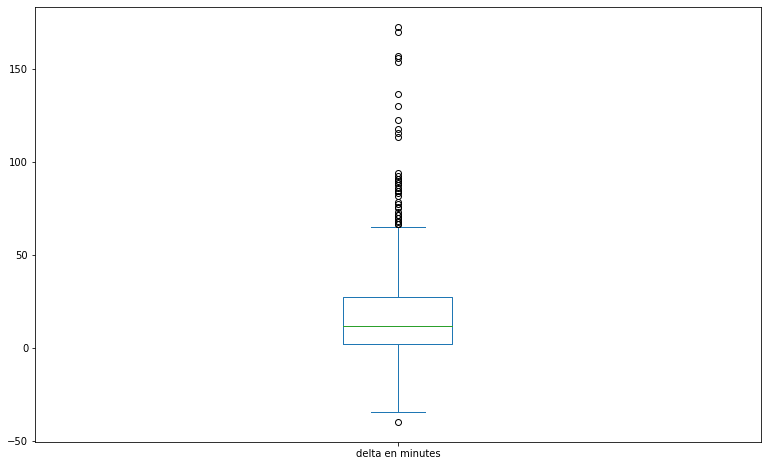

In [40]:
df_elec_excence["delta en minutes"].plot.box();

C:\Users\thabet.chaaouri\.virtualenvs\Elections-2cJJLuao\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


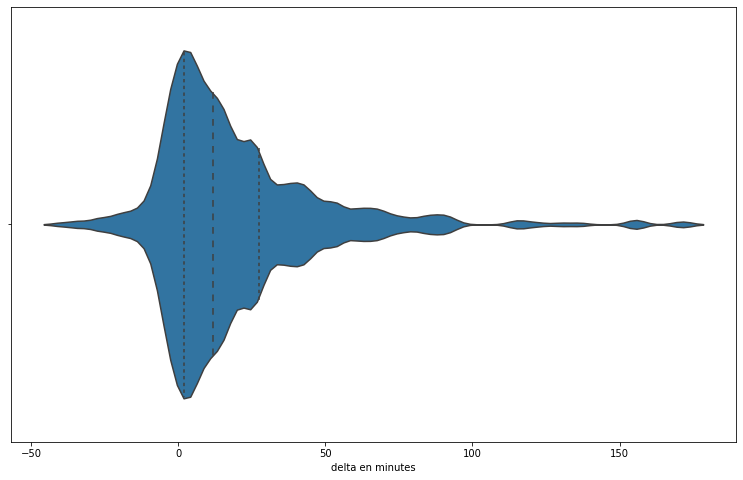

In [41]:
sb.violinplot(df_elec_excence["delta en minutes"], inner="quartile",bw=0.1);

In [69]:
first_sais_elec=pd.DataFrame(df_elec_excence.resample('10T', on="Date première saisie").LIEU.count().cumsum()).reset_index()
last_sais_elec=pd.DataFrame(df_elec_excence.resample('10T', on="Date dernière saisie").LIEU.count().cumsum()).reset_index()
first_sais_exce=pd.DataFrame(df_elec_excence.resample('10T', on="Date première saisie excense").LIEU.count().cumsum()).reset_index()

In [70]:
Compa_firstsaisie=pd.merge(first_sais_elec,first_sais_exce, left_on="Date première saisie", right_on="Date première saisie excense", how="outer" )


In [71]:
Compa_firstsaisie.iloc[36,0] = dt.datetime(2022,6,20, 0,40,0)
Compa_firstsaisie.iloc[37,0] = dt.datetime(2022,6,20, 0,50,0)
Compa_firstsaisie=Compa_firstsaisie.drop("Date première saisie excense", axis=1)

Compa_firstsaisie.rename({"LIEU_x":"nb_circo_elec",
                          "LIEU_y":"nb_circo_excense"},axis=1)

,Date première saisie,nb_circo_elec,nb_circo_excense
0,2022-06-19 18:40:00,1.0,NaN
1,2022-06-19 18:50:00,1.0,NaN
2,2022-06-19 19:00:00,1.0,NaN
3,2022-06-19 19:10:00,4.0,NaN
4,2022-06-19 19:20:00,4.0,NaN
5,2022-06-19 19:30:00,4.0,NaN
6,2022-06-19 19:40:00,8.0,NaN
7,2022-06-19 19:50:00,13.0,NaN
8,2022-06-19 20:00:00,38.0,11.0
9,2022-06-19 20:10:00,87.0,49.0


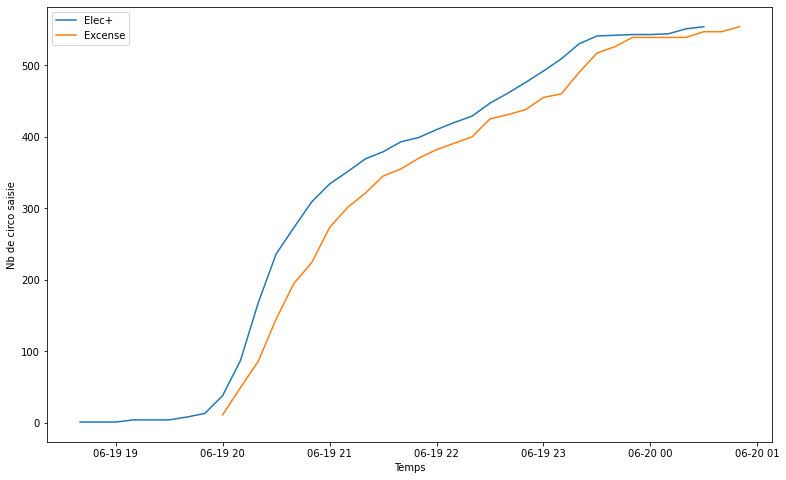

In [48]:
fig, ax =plt.subplots()
ax.plot(first_sais_elec["Date première saisie"],first_sais_elec["LIEU"], label="Elec+")
ax.plot(first_sais_exce["Date première saisie excense"],first_sais_exce["LIEU"], label="Excense")
ax.set_xlabel("Temps")
ax.set_ylabel("Nb de circo saisie")
ax.legend();

trouver les personnalités suivis/ les circonscriptions test (liste des personnes / associés circo demandés à Minh Tam)

Aggregation par antenne régions (mapping depar circo demandée à Minh Tâm)

Ecarter les OM pour supprimer les outliers

Isoler l'ile de France dans une étude séparée

In [26]:
df_IDF=df_elec_excence.loc[df_elec_excence.LIEU.str.startswith(("077","078", "075", "092", "091", "093", "094", "095"))]

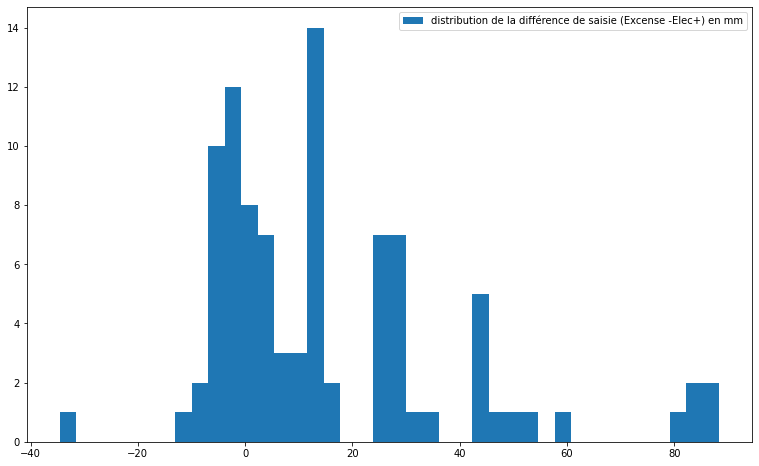

In [27]:
fig,ax =plt.subplots()
ax.hist(df_IDF["delta en minutes"], bins=40, label="distribution de la différence de saisie (Excense -Elec+) en mm")
ax.legend();
